In [1]:
import cv2
import sklearn as sk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import os
import imutils
import random
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
import keras
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
import tensorflow.keras.utils
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from sklearn import metrics
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


In [2]:
cv2.setUseOptimized(True);
cv2.setNumThreads(4);

categories = ["Hand", "NoHand"]
directory = "../../../HandsData/"
imageWidth = 100

In [3]:
X = []
y = []

for category in categories:
    
    path = directory + category
    
    for img in tqdm(os.listdir(path)[::3]):
    
        image = cv2.imread(path + "/" + img)
        image = imutils.resize(image, width=imageWidth)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        X.append(image)
        y.append(list(categories).index(category))
        
        


 62%|█████████████████████████████████████████████████▉                              | 395/633 [00:13<00:08, 29.46it/s]


KeyboardInterrupt: 

In [ ]:
# print(y)
# print(X)

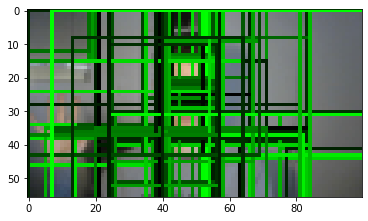

In [4]:
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()

firstImage = X[200].copy()

displayedImage = firstImage.copy()

ss.setBaseImage(firstImage)

ss.switchToSelectiveSearchQuality()

rects = ss.process()
newImages = []

for index, i in enumerate(rects):
    x, y_, w, h = i
    cv2.rectangle(displayedImage, (x, y_), (x+w, y_+h), (0,random.random()*255,0))
    newImages.append(firstImage[y_:y_+h, x:x+w])

plt.imshow(displayedImage)
plt.show()

In [ ]:
#y = tf.keras.utils.to_categorical(np.asarray(y))
y = tf.keras.utils.to_categorical(np.asarray(y))
X = np.array(X).reshape(-1, 56, 100, 3)

print(y)
print(y[:5])
print(X[0][0][:5])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=31)




In [ ]:
model = Sequential()


model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=X.shape[1:]))
model.add(MaxPooling2D())
model.add(Dropout(0.5))

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.5))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=128, activation='relu'))

model.add(Dense(units=2, activation = 'softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

#print(X_train, y_train)

In [ ]:
print(X_train.shape)
print(y_train)

In [ ]:
history = model.fit(X_train, y_train, verbose=2, epochs=20)

In [ ]:
pred_hot = model.predict(X_test)

pred = np.argmax(pred_hot, axis=1)

y_compare = np.argmax(y_test, axis=1)

score = metrics.accuracy_score(y_compare, pred)

print("Accuracy score: {}".format(score))
